In [1]:
#%matplotlib inline
%matplotlib notebook
from sklearn.utils import shuffle
import pandas as pd
import csv
import numpy as np
import time 
from math import radians, cos, sin, asin, sqrt
import re, math
# for database operations
import sys
import csv
import pandas as pd
from haversine import haversine
import datetime
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D


In [2]:


def ST_DBSCAN(points,max_distance,MinPts,dayRadius):
    global visited 
    visited = []
    noise = []
    c_neighbors = []
    cluster_id = 0
    clusters = []
    in_cluster = []
    for p in points: 
        if p not in visited:
            # neighbor_points = []
            visited.append(p)
            NeighborPts = regionQuery(p,points,max_distance,dayRadius)
            if len(NeighborPts) < MinPts:
                noise.append(p)
            else:
                cluster_id = cluster_id + 1
                g = expandCluster(p,NeighborPts,max_distance,MinPts,in_cluster,cluster_id)
                clusters.append(g)
                c_neighbors=NeighborPts+[cluster_id]
                #print c_neighbors
                c_neighbors.append(g)
    return clusters, c_neighbors

#return len(NeighborPts)

def expandCluster(p,NeighborPts,max_distance,MinPts,in_cluster,cluster_id):
    in_cluster.append(p)
    cluster = []
    t_p = list(p) + [cluster_id]
    cluster.append(t_p)
    for point in NeighborPts:
        if point not in visited:
            visited.append(point)
            new_neighbors = regionQuery(point,points,max_distance,dayRadius)
            if len(new_neighbors) >= MinPts: 
                new_neighbors.append(NeighborPts)
            if point not in in_cluster:
                 t_point = list(point) + [cluster_id]
                 in_cluster.append(point)
                 cluster.append(t_point)
    return cluster


def regionQuery(p,points,max_distance,dayRadius):
    neighbor_points = []
    loc1 = (p[0],p[1])
    for j in points:
        if j != p:
            # print 'P is %s and j is %s' % (p[0],j[0])
            if abs(p[2]-j[2]) < dayRadius:
                loc2 = (j[0],j[1])
                dist = haversine(loc1, loc2)
                if dist <= max_distance:
                    neighbor_points.append(j)
    neighbor_points.append(p) 
    return neighbor_points   


In [3]:
max_distance = 500
MaxPts = 5
dayRadius = 30

df = pd.DataFrame.from_csv('D:/Nanohub/TribeFlow/in_STDB_2015.csv', sep ='\t', encoding = 'UTF-8', header = None)
df.columns = ['ip','resource id','datetime','latitude','longitude']
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by = 'resource id', axis = 0, ascending = True, na_position ='first')
df_no_dups = df.drop_duplicates(subset = ['ip','resource id'], keep = 'first')
doy = []
for date in df['datetime']:
    doy.append(date.dayofyear)
df['DoY'] = doy

df_10 = df[df.groupby('resource id').cumcount(ascending=False) >= 10]

for l in range(21095,22000):
    df_filtered = df_10[df_10['resource id'] == l]
    df_filtered =df_filtered[df_filtered['latitude'] > 0]
    tups = df_filtered.set_index(['latitude'])[['longitude','DoY','resource id'],['IP']].to_records().tolist()
    points = tups
    core, neigh = ST_DBSCAN(points,max_distance,MaxPts,dayRadius)
    
    fname = 'D:/Nanohub/results/GIS2/' + str(l) +'.csv'
    
    f = open(fname, 'wt')
    try:
        writer = csv.writer(f, lineterminator = '\n')
        #writer.writerow( ('Latitude', 'Longitude', 'DoY' , 'res_id' , 'cluster_id') )

        for j in range(len(core)):
            for i in range(len(core[j])):
                    writer.writerow( core[j][i] )
    finally:
        f.close()


In [6]:
f1name = 'D:/Nanohub/results/GIS2/' + str(10) +'.csv'
f2name = 'D:/Nanohub/results/GIS2/' + str(11) +'.csv'
f3name = 'D:/Nanohub/results/GIS2/' + str(12) +'.csv'
    
    

In [7]:
df1 = pd.read_csv(f1name, sep =',', names = ['Latitude', 'Longitude', 'DoY' , 'res_id' , 'cluster_id'])
df2 = pd.read_csv(f2name, sep =',', names = ['Latitude', 'Longitude', 'DoY' , 'res_id' , 'cluster_id'])
df3 = pd.read_csv(f3name, sep =',', names = ['Latitude', 'Longitude', 'DoY' , 'res_id' , 'cluster_id'])


<IPython.core.display.Javascript object>


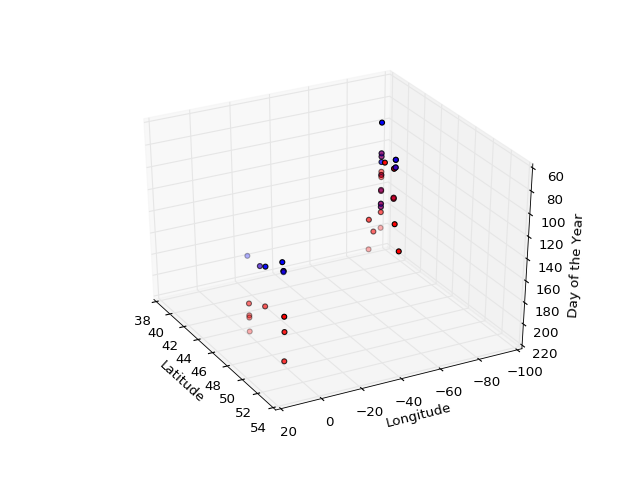

In [8]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cnum in range(1,max(df1['cluster_id'] + 1)):
    c = cnum * 7
    curr_df = df1[df1['cluster_id'] == cnum]
    xs = curr_df['Latitude']
    ys = curr_df['Longitude']
    zs = curr_df['DoY']
    ax.scatter(xs, ys, zs, c='b', marker='o')
for cnum in range(1,max(df2['cluster_id'] + 1)):
    c = cnum * 7
    curr_df = df2[df2['cluster_id'] == cnum]
    xs = curr_df['Latitude']
    ys = curr_df['Longitude']
    zs = curr_df['DoY']
    ax.scatter(xs, ys, zs, c='r', marker='o')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Day of the Year')
plt.show()

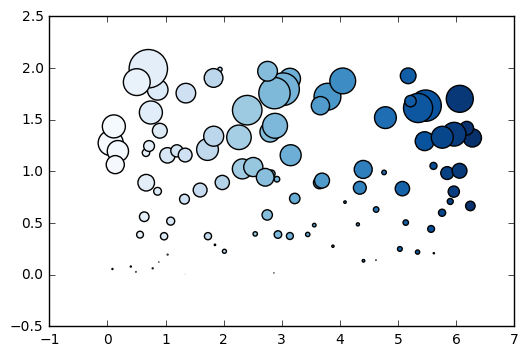

In [22]:
#http://chrisalbon.com/python/set_the_color_of_a_matplotlib.html
%matplotlib inline
n = 100
r = 2 * numpy.random.rand(n)
theta = 2 * numpy.pi * numpy.random.rand(n)
area = 200 * r**2 * numpy.random.rand(n)
colors = theta
c2 = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.BrBG)

In [23]:
print(plt.cm.gist_earth[])

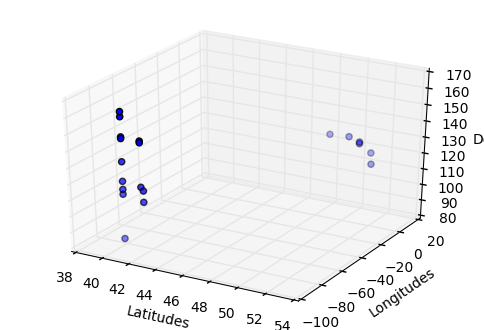

In [49]:
threedee = plt.figure().gca(projection = '3d')
threedee.scatter(df1['Latitude'], df1['Longitude'], df1['DoY'])
threedee.set_xlabel('Latitudes')
threedee.set_ylabel('Longitudes')
threedee.set_zlabel('DoY')
plt.show()

In [18]:
xs = df1['Latitude']
ys = df1['Longitude']
zs = df1['DoY']

In [51]:
import Basemap
map = Basemap()
fig = plt.figure()
ax = Axes3D(fig)
ax.add_collection3d(map.drawcoastlines(linewidth=0.25))
ax.add_collection3d(map.drawcountries(linewidth=0.35))
ax.add_collection3d(map.drawstates(linewidth = 0.1))

ImportError: No module named 'Basemap'